In [1]:
import concurrent.futures
import json
from pathlib import Path

from virtual_lab.constants import CONSISTENT_TEMPERATURE, CREATIVE_TEMPERATURE
from virtual_lab.prompts import (
    CODING_RULES,
    REWRITE_PROMPT,
    create_merge_prompt,
)
from virtual_lab.run_meeting import run_meeting
from virtual_lab.utils import load_summaries

from nanobody_constants import (
    background_prompt,
    nanobody_prompt,
    num_iterations,
    num_rounds,
    discussions_phase_to_dir,
    principal_investigator,
    team_members,
    machine_learning_specialist,
    computational_biologist,
    scientific_critic
)

## Team selection

In [2]:
# Team selection - prompts
team_selection_agenda = f"""{background_prompt} You need to select a team of three scientists to help you with this project. Please select the team members that you would like to invite to a discussion to create the antibody/nanobody design approach. Please list the team members in the following format, using the team member below as an example. You should not include yourself (Principal Investigator) in the list.

Agent(
    title="Principal Investigator",
    expertise="applying artificial intelligence to biomedical research",
    goal="perform research in your area of expertise that maximizes the scientific impact of the work",
    role="lead a team of experts to solve an important problem in artificial intelligence for biomedicine, make key decisions about the project direction based on team member input, and manage the project timeline and resources",
)
"""

In [3]:
# Team selection - discussion
with concurrent.futures.ThreadPoolExecutor() as executor:
    concurrent.futures.wait([
        executor.submit(
            run_meeting,
            meeting_type="individual",
            team_member=principal_investigator,
            agenda=team_selection_agenda,
            save_dir=discussions_phase_to_dir["team_selection"],
            save_name=f"discussion_{iteration_num + 1}",
            temperature=CREATIVE_TEMPERATURE,
        ) for iteration_num in range(num_iterations)
    ])

The question “What is the meaning of life?” has been asked, debated, and answered in countless ways for millennia. Because there’s no single, universally accepted answer, most people find that the “meaning” they give to life is a mix of personal values, cultural narratives, and philosophical reflections. Below are a few broad perspectives that help illustrate why the answer is ultimately subjective and why many find it useful to search for their own “meaning.”

---

## 1. Existentialist & Humanistic View

### Core Idea
Existentialists (e.g., Jean‑Paul Sartre, Albert Camus) argue that life has no pre‑written purpose; *you* create it through choices and actions. Humanistic psychologists (e.g., Abraham Maslow, Carl Rogers) suggest that realizing your own potential, fostering authentic relationships, and serving a larger good are sources of genuine meaning.

### Key Takeaways

| Aspect | What It Teaches | How It May Shape Your Life |
|--------|-----------------|---------------------------|

In [4]:
# Team selection - merge
team_selection_summaries = load_summaries(
    discussion_paths=list(discussions_phase_to_dir["team_selection"].glob("discussion_*.json")))
print(f"Number of summaries: {len(team_selection_summaries)}")

team_selection_merge_prompt = create_merge_prompt(agenda=team_selection_agenda)

run_meeting(
    meeting_type="individual",
    team_member=principal_investigator,
    summaries=team_selection_summaries,
    agenda=team_selection_merge_prompt,
    save_dir=discussions_phase_to_dir["team_selection"],
    save_name="merged",
    temperature=CONSISTENT_TEMPERATURE,
)

Number of summaries: 5
The question “What is the meaning of life?” has occupied philosophers, theologians, scientists, artists, and ordinary people for millennia. Because it cuts to the heart of the human condition, the answer is rarely a single, definitive statement; instead it is a tapestry of perspectives that reflect our values, cultures, and individual experiences. Below is a brief survey of some of the most influential ways people have approached the question, followed by a few personal reflections that many find useful.

---

## 1. **Religious/Spiritual Viewpoints**

| Tradition | Core Idea | Typical Answer |
|-----------|-----------|----------------|
| **Christianity** | Life is a gift from God, meant to love and serve Him | “To live in obedience to God, ultimately sharing in eternal life with Him.” |
| **Islam** | Life is a test; living righteously earns God’s pleasure | “To obey Allah’s commandments, seeking paradise after death.” |
| **Hinduism** | Cycle of karma and rebirth

AttributeError: 'str' object has no attribute 'id'

## Projects specification

In [5]:
# Project specification - prompts
project_specification_agenda = f"{background_prompt} Please create an antibody/nanobody design approach to solve this problem. Decide whether you will design antibodies or nanobodies. For your choice, decide whether you will design the antibodies/nanobodies de novo or whether you will modify existing antibodies/nanobodies. If modifying existing antibodies/nanobodies, please specify which antibodies/nanobodies to start with as good candidates for targeting the newest variant of the SARS-CoV-2 spike protein. If designing antibodies/nanobodies de novo, please describe how you will propose antibody/nanobody candidates."

project_specification_questions = (
    "Will you design standard antibodies or nanobodies?",
    "Will you design antibodies/nanobodies de novo or will you modify existing antibodies/nanobodies (choose only one)?",
    "If modifying existing antibodies/nanobodies, which precise antibodies/nanobodies will you modify (please list 3-4)?",
    "If designing antibodies/nanobodies de novo, how exactly will you propose antibody/nanobody candidates?",
)

In [6]:
# Project specification - discussion
with concurrent.futures.ThreadPoolExecutor() as executor:
    concurrent.futures.wait([
        executor.submit(
            run_meeting,
            meeting_type="team",
            team_lead=principal_investigator,
            team_members=team_members,
            agenda=project_specification_agenda,
            agenda_questions=project_specification_questions,
            save_dir=discussions_phase_to_dir["project_specification"],
            save_name=f"discussion_{iteration_num + 1}",
            temperature=CREATIVE_TEMPERATURE,
            num_rounds=num_rounds,
        ) for iteration_num in range(num_iterations)
    ])

The meaning of life is a question that has no single, universally accepted answer.  
- **Philosophical views**: Existentialists argue that we create our own meaning through choices and authenticity; nihilists claim there is no inherent purpose; humanists suggest meaning arises from human connections, creativity, and the pursuit of well‑being.  
- **Religious / spiritual perspectives**: Many traditions hold that life’s purpose is to honor a higher power, cultivate virtue, or reach a state of enlightenment or communion.  
- **Practical outlook**: For many, meaning is found in relationships, personal growth, contributing to something larger than oneself, or simply enjoying the present moment.

Ultimately, the “meaning” we assign to our lives often reflects our values, goals, and the ways we choose to engage with the world. It’s a deeply personal exploration rather than a fixed truth.
DEBUG team contents:
Principal Investigator <class 'virtual_lab.agent.Agent'>
Immunologist <class 'virtual

In [7]:
# Project specification - merge
project_specification_summaries = load_summaries(
    discussion_paths=list(discussions_phase_to_dir["project_specification"].glob("discussion_*.json")))
print(f"Number of summaries: {len(project_specification_summaries)}")

project_specification_merge_prompt = create_merge_prompt(
    agenda=project_specification_agenda,
    agenda_questions=project_specification_questions,
)

run_meeting(
    meeting_type="individual",
    team_member=principal_investigator,
    summaries=project_specification_summaries,
    agenda=project_specification_merge_prompt,
    save_dir=discussions_phase_to_dir["project_specification"],
    save_name="merged",
    temperature=CONSISTENT_TEMPERATURE,
    num_rounds=num_rounds,
)

Number of summaries: 5
### A Multi‑Perspective Look at “What Is the Meaning of Life?”

The question “What is the meaning of life?” has pre‑occupied humanity for millennia. Because it is so broad, thinkers have offered answers from each of our deepest domains—philosophy, religion, science, literature—and from the place of everyday lived experience. Below is a map of the most influential perspectives, each offering a different lens through which to view our existence. (Feel free to pick one that resonates, combine them, or use them to spark your own inquiry.)

| Domain | Core Idea | Representative Thinkers / Traditions | How It Shapes Your Life |
|--------|-----------|--------------------------------------|------------------------|
| **Religious / Spiritual** | Life is part of a divine plan or a spiritual progression. Purpose emerges from fulfilling a sacred purpose, achieving enlightenment, or preparing for an afterlife. | • Christianity: Love God & neighbor<br>• Hinduism: Dharma + Moks

AttributeError: 'str' object has no attribute 'id'

## Tools Selection

In [8]:
# Tools selection - prompts
tools_selection_agenda = f"{background_prompt} {nanobody_prompt} Now you need to select machine learning and/or computational tools to implement this nanobody design approach. Please list several tools (5-10) that would be relevant to this nanobody design approach and how they could be used in the context of this project. If selecting machine learning tools, please prioritize pre-trained models (e.g., pre-trained protein language models or protein structure prediction models) for simplicity."

tools_selection_questions = (
    "What machine learning and/or computational tools could be used for this nanobody design approach (list 5-10)?",
    "For each tool, how could it be used for designing modified nanobodies?",
)

tools_selection_prior_summaries = load_summaries(
    discussion_paths=[discussions_phase_to_dir["project_specification"] / "merged.json"])
print(f"Number of prior summaries: {len(tools_selection_prior_summaries)}")

Number of prior summaries: 1


In [9]:
# Tools selection - discussion
with concurrent.futures.ThreadPoolExecutor() as executor:
    concurrent.futures.wait([
        executor.submit(
            run_meeting,
            meeting_type="team",
            team_lead=principal_investigator,
            team_members=team_members,
            summaries=tools_selection_prior_summaries,
            agenda=tools_selection_agenda,
            agenda_questions=tools_selection_questions,
            save_dir=discussions_phase_to_dir["tools_selection"],
            save_name=f"discussion_{iteration_num + 1}",
            temperature=CREATIVE_TEMPERATURE,
            num_rounds=num_rounds,
        ) for iteration_num in range(num_iterations)
    ])

The “meaning of life” is one of the oldest and most debated questions in philosophy, religion, science, and everyday life. Because there’s no single, universally accepted answer, most thinkers frame it in terms of frameworks that can guide how we live, relate, and grow. Below are a few broad perspectives that people often turn to when seeking meaning:

| Perspective | Core Idea | How It Shapes a Life’s Purpose |
|-------------|----------|---------------------------------|
| **Religious/Spiritual** | Life is guided by a divine plan, higher truths, or cosmic order. | Service to a higher power, cultivating virtues, fostering community, preparing for an afterlife or rebirth. |
| **Humanistic (Existential) Psychology** | Meaning comes from personal authenticity, self‑actualization, and creating values in an indifferent universe. | Choosing projects that resonate, developing close relationships, engaging in lifelong learning, and staying true to one’s values. |
| **Ethical Altruism** | Purpo

In [10]:
# Tools selection - merge
tools_selection_summaries = load_summaries(
    discussion_paths=list(discussions_phase_to_dir["tools_selection"].glob("discussion_*.json")))
print(f"Number of summaries: {len(tools_selection_summaries)}")

tools_selection_merge_prompt = create_merge_prompt(
    agenda=tools_selection_agenda,
    agenda_questions=tools_selection_questions,
)

run_meeting(
    meeting_type="individual",
    team_member=principal_investigator,
    summaries=tools_selection_summaries,
    agenda=tools_selection_merge_prompt,
    save_dir=discussions_phase_to_dir["tools_selection"],
    save_name="merged",
    temperature=CONSISTENT_TEMPERATURE,
    num_rounds=num_rounds,
)

Number of summaries: 5
**Answering “What is the meaning of life?” is a task that has occupied philosophers, theologians, scientists, artists, and ordinary people for millennia.**  
Because there is no single, universally accepted answer, most thinkers agree that the question is **context‑dependent**—the *answer* you fetch depends on the lenses through which you view existence. Below is a “menu” of some of the most influential perspectives, along with a few practical suggestions for the person who wants to craft his or her own meaning.

---

## 1. Philosophical Frameworks

| Perspective | Core Idea | Typical Take‑Away |
|-------------|-----------|-------------------|
| **Existentialism** (Sartre, Camus, Kierkegaard) | Human existence pre‑cedes essence; we are free (and responsible) to create our own purpose. | *The meaning is not given; it is built by the choices we make, even in absurd settings.* |
| **Humanism / Secular Ethics** | Ethical living and the flourishing of humanity are pri

AttributeError: 'str' object has no attribute 'id'

## Implementation

In [11]:
# Implementation - prompts
implementation_agent_selection_agenda = f"{background_prompt} {nanobody_prompt} Your team needs to build three components of a nanobody design pipeline: ESM, AlphaFold-Multimer, and Rosetta. For each component, please select the team member who will implement the component. A team member may implement more than one component."

implementation_agent_selection_questions = (
    "Which team member will implement ESM?",
    "Which team member will implement AlphaFold-Multimer?",
    "Which team member will implement Rosetta?",
)

implementation_agent_selection_prior_summaries = load_summaries(
    discussion_paths=[discussions_phase_to_dir["team_selection"] / "merged.json",
                      discussions_phase_to_dir["project_specification"] / "merged.json",
                      discussions_phase_to_dir["tools_selection"] / "merged.json"])
print(f"Number of prior summaries: {len(implementation_agent_selection_prior_summaries)}")

Number of prior summaries: 3


In [12]:
# Implementation - discussion
with concurrent.futures.ThreadPoolExecutor() as executor:
    concurrent.futures.wait([
        executor.submit(
            run_meeting,
            meeting_type="individual",
            team_member=principal_investigator,
            summaries=implementation_agent_selection_prior_summaries,
            agenda=implementation_agent_selection_agenda,
            agenda_questions=implementation_agent_selection_questions,
            save_dir=discussions_phase_to_dir["implementation_agent_selection"],
            save_name=f"discussion_{iteration_num + 1}",
            temperature=CREATIVE_TEMPERATURE,
        ) for iteration_num in range(num_iterations)
    ])

The question “What is the meaning of life?” has fascinated humans for millennia, and there is no single, universally accepted answer. Instead, people create meaning through a mix of philosophical beliefs, cultural traditions, personal goals, and relationships. Below are several common frameworks people use to find purpose, along with some practical ways you might explore them yourself.

| Perspective | Core Idea | How It Shapes Life | Practical Questions to Ask |
|-------------|-----------|--------------------|---------------------------|
| **Existentialist** | Life has no built‑in meaning; we create it through choice and authenticity. | Emphasizes personal freedom, responsibility, and living “in the moment.” | *What does authenticity mean to me?*<br>*Are my actions aligned with my values?* |
| **Theistic/Religious** | Meaning arises from relationship with a divine power or adherence to sacred teachings. | Offers purpose through service, obedience, moral codes, and community. | *What s

In [13]:
# Implementation - merge
implementation_agent_selection_summaries = load_summaries(
    discussion_paths=list(discussions_phase_to_dir["implementation_agent_selection"].glob("discussion_*.json")))
print(f"Number of summaries: {len(implementation_agent_selection_summaries)}")

implementation_agent_selection_merge_prompt = create_merge_prompt(
    agenda=implementation_agent_selection_agenda,
    agenda_questions=implementation_agent_selection_questions
)

run_meeting(
    meeting_type="individual",
    team_member=principal_investigator,
    summaries=implementation_agent_selection_summaries,
    agenda=implementation_agent_selection_merge_prompt,
    save_dir=discussions_phase_to_dir["implementation_agent_selection"],
    save_name="merged",
    temperature=CONSISTENT_TEMPERATURE,
)

Number of summaries: 5
The question “What is the meaning of life?” has been asked since the dawn of language. Because it touches on philosophy, religion, science, and the everyday quest for purpose, there’s no single answer that satisfies everyone. Below is a quick guide to some of the most common ways people think about it—and some ideas on how you might find your own answer.

---

## 1. The Philosophical Viewpoints

| Tradition | Core Idea | Example Quote |
|-----------|-----------|---------------|
| **Existentialism** | Life has no predetermined meaning; we create it through choices. | “We are what we do, and that is why I begin to act upon what I stand for.” – Simone de Beauvoir |
| **Stoicism** | Meaning is derived from living in harmony with nature and focusing on what we can control. | “The wise man is indifferent to the inevitabilities of life: life, death, fate.” – Marcus Aurelius |
| **Humanism** | Purpose is found in improving humanity, seeking knowledge, and fostering empat

AttributeError: 'str' object has no attribute 'id'

### ESM

In [14]:
# ESM - prompts
esm_agenda = f"{background_prompt} {nanobody_prompt} Now you must use ESM to suggest modifications to an existing antibody. Please write a complete Python script that takes a nanobody sequence as input and uses ESM amino acid log-likelihoods to identify the most promising point mutations by log-likelihood ratio."

In [15]:
# ESM - discussion
with concurrent.futures.ThreadPoolExecutor() as executor:
    concurrent.futures.wait([
        executor.submit(
            run_meeting,
            meeting_type="individual",
            team_member=machine_learning_specialist,
            agenda=esm_agenda,
            agenda_rules=CODING_RULES,
            save_dir=discussions_phase_to_dir["esm"],
            save_name=f"discussion_{iteration_num + 1}",
            temperature=CREATIVE_TEMPERATURE,
            num_rounds=num_rounds,
        ) for iteration_num in range(num_iterations)
    ])

The question “What is the meaning of life?” has occupied thinkers, artists, scientists, and ordinary people for millennia. Because it touches on the very foundations of values, identity, and the human condition, there is no single, universally accepted answer. Instead, most perspectives can be grouped into a few broad themes that people use to make sense of their own existence.

| Perspective | Core Idea | Typical Sources | What It Says About *Meaning* |
|-------------|-----------|-----------------|-----------------------------|
| **Religious / Spiritual** | Life has a purpose given by a divine or transcendent reality (e.g., God, Buddha, Tao). | Sacred texts, spiritual traditions, personal revelation. | The meaning is external: obey a divine will, attain enlightenment, live in harmony with a cosmic order. |
| **Humanist / Secular** | Meaning emerges from human relationships, creativity, and the pursuit of knowledge. | Ethics, literature, science, community projects. | The meaning is co

In [16]:
# ESM - merge
esm_summaries = load_summaries(discussion_paths=list(discussions_phase_to_dir["esm"].glob("discussion_*.json")))
print(f"Number of summaries: {len(esm_summaries)}")

esm_merge_prompt = create_merge_prompt(
    agenda=esm_agenda,
    agenda_rules=CODING_RULES,
)

run_meeting(
    meeting_type="individual",
    team_member=machine_learning_specialist,
    summaries=esm_summaries,
    agenda=esm_merge_prompt,
    save_dir=discussions_phase_to_dir["esm"],
    save_name="merged",
    temperature=CONSISTENT_TEMPERATURE,
)

Number of summaries: 5
The question *“What is the meaning of life?”* has been asked in shop‑front cafés, on lecture stages, and in the quiet corners of bedrooms for millennia. There is no single answer that satisfies every mind, culture, or science, but the richness of the possible replies is part of what makes the question so compelling. Below are a few perspectives that have shaped human thought, followed by some practical ways you can engage with the idea for yourself.

---

## 1. Philosophical Traditions

| Tradition | Core Idea | Typical Take‑away |
|-----------|-----------|-----------------|
| **Ancient Greek** (Socrates, Aristotle) | Life’s purpose is to attain *eudaimonia*—a flourishing life achieved through virtue and reason. | “LIVE in alignment with your own rational nature.” |
| **Eastern** (Buddhism, Taoism) | The aim is to recognize impermanence, release attachment, and cultivate compassion or harmony with the Dao. | “Find stillness; let desire dissolve.” |
| **Existentia

AttributeError: 'str' object has no attribute 'id'

### Improve ESM

In [17]:
# Improve ESM - prompts
improve_esm_agenda = f"""You previously wrote a Python script that uses ESM to compute the log-likelihood ratio of point mutations in a nanobody sequence (see summary). {REWRITE_PROMPT}

1. Replace "facebook/esm1b-t33_650M_UR50S" with "facebook/esm1b_t33_650M_UR50S".
2. Run the calculations of the mutant log-likelihoods by iterating through the sequences in batches of 16.
3. Add a progress bar to the batched mutant log-likelihood calculations.
4. Run the mutant log-likelihood calculations on CUDA but with no gradients.
5. Load the nanobody sequence from a user-specified CSV file that has the columns "sequence" and "name". Adapt your code to run the mutant log-likelihood calculations on all sequences in the CSV file one-by-one.
6. For each sequence, save the mutant log-likelihoods to a CSV file with the format "mutated_sequence,position,original_aa,mutated_aa,log_likelihood_ratio". Ask the user for a save directory and then save this CSV file in that directory with the name: <nanbody-name>.csv."""

In [18]:
# Improve ESM - discussion
improve_esm_summaries = load_summaries(discussion_paths=[discussions_phase_to_dir["esm"] / "merged.json"])
print(f"Number of summaries: {len(improve_esm_summaries)}")

run_meeting(
    meeting_type="individual",
    team_member=machine_learning_specialist,
    summaries=improve_esm_summaries,
    agenda=improve_esm_agenda,
    save_dir=discussions_phase_to_dir["esm"],
    save_name="improved",
    temperature=CONSISTENT_TEMPERATURE,
)

Number of summaries: 1
The question “What is the meaning of life?” has occupied philosophers, theologians, scientists, poets, and ordinary people for millennia. Because “meaning” is a value‑laden and context‑sensitive idea, no single answer satisfies everyone. Below is a broad overview of some of the most influential perspectives and a little guidance on how you might locate—or create—meaning for yourself.

---

## 1. Philosophical Traditions

| Tradition | Core Idea | How it Shapes Life |
|-----------|-----------|--------------------|
| **Existentialism** (Sartre, Kierkegaard) | Life has no predetermined purpose; we must create our own meaning through authentic choices. | Encourages personal responsibility; freedom is both a gift and a burden. |
| **Stoicism** (Epictetus, Marcus Aurelius) | Live in accordance with nature, cultivate inner virtue, accept what you cannot change. | Emphasizes resilience and equanimity; meaning comes from inner peace. |
| **Nihilism** (Nietzsche, Schopenha

AttributeError: 'str' object has no attribute 'id'

### AlphaFold-Multimer

In [19]:
# AlphaFold-Multimer - prompts
alphafold_agenda = f"{background_prompt} {nanobody_prompt} Now you must use AlphaFold-Multimer to predict the structure of a nanobody-antigen complex and evaluate its binding. I will run AlphaFold-Multimer on several nanobody-antigen complexes and you need to process the outputs. Please write a complete Python script that takes as input a directory containing PDB files where each PDB file contains one nanobody-antigen complex predicted by AlphaFold-Multimer and outputs a CSV file containing the AlphaFold-Multimer confidence of each nanobody-antigen complex in terms of the interface pLDDT."

In [20]:
# AlphaFold-Multimer - discussion
with concurrent.futures.ThreadPoolExecutor() as executor:
    concurrent.futures.wait([
        executor.submit(
            run_meeting,
            meeting_type="individual",
            team_member=computational_biologist,
            agenda=alphafold_agenda,
            agenda_rules=CODING_RULES,
            save_dir=discussions_phase_to_dir["alphafold"],
            save_name=f"discussion_{iteration_num + 1}",
            temperature=CREATIVE_TEMPERATURE,
            num_rounds=num_rounds,
        ) for iteration_num in range(num_iterations)
    ])

The classic question of “what is the meaning of life?” has no single, universally accepted answer. Instead, it invites us to explore a range of philosophical, spiritual, and practical viewpoints. Below is a quick survey of some of the most influential perspectives, plus a few practical suggestions for finding personal meaning.

| Perspective | Core Idea | Common Examples |
|-------------|-----------|-----------------|
| **Existentialist** | Life has no pre‑written purpose; you create your own. | Choosing a career that aligns with your values, pursuing relationships you truly care about. |
| **Religious/Spiritual** | Life’s purpose is tied to a higher power, moral code, or cosmic plan. | Serving as a faithful follower, practicing devotion, helping others through charity. |
| **Humanist** | Meaning emerges from human flourishing—reason, empathy, and creativity. | Advancing science, protecting the environment, creating art. |
| **Biological/ Evolutionary** | Life’s “purpose” is to survive

In [21]:
# AlphaFold-Multimer - merge
alphafold_summaries = load_summaries(
    discussion_paths=list(discussions_phase_to_dir["alphafold"].glob("discussion_*.json")))
print(f"Number of summaries: {len(alphafold_summaries)}")

alphafold_merge_prompt = create_merge_prompt(
    agenda=alphafold_agenda,
    agenda_rules=CODING_RULES,
)

run_meeting(
    meeting_type="individual",
    team_member=computational_biologist,
    summaries=alphafold_summaries,
    agenda=alphafold_merge_prompt,
    save_dir=discussions_phase_to_dir["alphafold"],
    save_name="merged",
    temperature=CONSISTENT_TEMPERATURE,
)

Number of summaries: 5
The old question that has occupied philosophers, scientists, poets and everyday people for centuries: **“What is the meaning of life?”**  
There is no single, universally accepted answer. Rather, a handful of complementary ways of looking at it often help people find their own sense of purpose:

---

## 1. **The “big‑picture” perspectives**

| Perspective | Core idea | Typical take‑away |
|-------------|-----------|-------------------|
| **Religious / Spiritual** | Life is a test, a journey toward a divine plan, or a chance to grow spiritually. | Meaning comes from aligning with a higher purpose, following teachings, or cultivating virtues. |
| **Evolutionary / Biological** | Life exists because organisms that reproduced survived. | Purpose is encoded in our biology: to survive, reproduce, and improve the chances of our genes. |
| **Philosophical (existentialism, absurdism)** | There is no pre‑written story; we create our own meaning. | Freedom and responsibility

AttributeError: 'str' object has no attribute 'id'

### Improve AlphaFold-Multimer

In [22]:
# Improve AlphaFold-Multimer - prompts
improve_alphafold_agenda = f"""You previously wrote a Python script that processes the outputs of AlphaFold-Multimer to calculate the confidence of nanobody-antigen complexes (see summary). {REWRITE_PROMPT}

1. Replace the current imports of Chain and Residue with "from Bio.PDB.Chain import Chain" and "from Bio.PDB.Residue import Residue".
2. Remove the logging setup and simply print any log messages to the console.
3. Replace the parallel processing with sequential processing to avoid getting an "OSError: Too many open files".
4. Change the list of pdb_files to instead get all PDB files in the directory that follow the pattern "**/*unrelaxed_rank_001*.pdb".
5. Change the calculation of average pLDDT to divide by the number of atoms rather than the number of residues.
6. Return and save in the CSV both the number of residues and the number of atoms in the interface.
7. Change the default distance threshold to 4."""

In [23]:
# Improve AlphaFold-Multimer - discussion
improve_alphafold_summaries = load_summaries(discussion_paths=[discussions_phase_to_dir["alphafold"] / "merged.json"])
print(f"Number of summaries: {len(improve_alphafold_summaries)}")

run_meeting(
    meeting_type="individual",
    team_member=computational_biologist,
    summaries=improve_alphafold_summaries,
    agenda=improve_alphafold_agenda,
    save_dir=discussions_phase_to_dir["alphafold"],
    save_name="improved",
    temperature=CONSISTENT_TEMPERATURE,
)

Number of summaries: 1
**Answer – a roadmap, not a final destination**

The “meaning of life” has been asked by philosophers, theologians, poets, scientists, and everyday people for millennia.  No single answer has universal authority, but we can sketch the most widely accepted frameworks, edge‑cases, and practical take‑aways that help us live a life that feels meaningful for ourselves and others.

| Perspective | Core idea | Typical questions it raises | What it can help you do |
|-------------|-----------|------------------------------|------------------------|
| **Existential & Humanistic** | Meaning isn’t handed to you; you create it through choices, relationships, and the way you confront freedom and responsibility. | “What does freedom mean to me?” “How do I live authentically?” | Encourage intentional living, embrace uncertainty, and turn projects into personal values. |
| **Religious & Spiritual** | Life’s purpose is often linked to the divine, a cosmic plan, or the cultivation

AttributeError: 'str' object has no attribute 'id'

### Rosetta

In [24]:
# Rosetta - prompts
rosetta_agenda = f"{background_prompt} {nanobody_prompt} Now you must use Rosetta to calculate the binding energy of nanobody-antigen complexes. You must do this in three parts. First, write a complete RosettaScripts XML file that calculates the binding energy of a nanobody-antigen complex as provided in PDB format, including any necessary preprocessing steps for the complex. Second, write an example command that uses Rosetta to run this RosettaScripts XML file on a given PDB file to calculate the binding energy and save it to a score file. Third, write a complete Python script that takes as input a directory with multiple Rosetta binding energy score files and outputs a single CSV file with the names and scores of each of the individual files in sorted order (highest to lowest score)."

In [25]:
# Rosetta - discussion
with concurrent.futures.ThreadPoolExecutor() as executor:
    concurrent.futures.wait([
        executor.submit(
            run_meeting,
            meeting_type="individual",
            team_member=computational_biologist,
            agenda=rosetta_agenda,
            agenda_rules=CODING_RULES,
            save_dir=discussions_phase_to_dir["rosetta"],
            save_name=f"discussion_{iteration_num + 1}",
            temperature=CREATIVE_TEMPERATURE,
            num_rounds=num_rounds,
        ) for iteration_num in range(num_iterations)
    ])

The question “What is the meaning of life?” has fascinated philosophers, scientists, writers, and ordinary people for millennia. Because it invites a personal, often deeply held answer, most responses mix objective insights with subjective reflection. Below are several broad perspectives that people often draw upon, along with a few practical ways to think about your own answer.

---

## 1. Philosophical / Existential Views

| Perspective | Core Idea | Typical Take‑away |
|-------------|-----------|-------------------|
| **Existentialism** | Life has no built‑in purpose; we must create it through choices, freedom, and authenticity. | “You are the author of your own story.” |
| **Absurdism** | The universe is indifferent but humans seek meaning; acknowledging the absurd can free us. | “Embrace the absurd, and find your own path.” |
| **Naturalism / Humanism** | Meaning comes from the natural world and human relationships, not supernatural forces. | “Create value through love, learning, 

In [26]:
# Rosetta - merge
rosetta_summaries = load_summaries(discussion_paths=list(discussions_phase_to_dir["rosetta"].glob("discussion_*.json")))
print(f"Number of summaries: {len(rosetta_summaries)}")

rosetta_merge_prompt = create_merge_prompt(
    agenda=rosetta_agenda,
    agenda_rules=CODING_RULES,
)

run_meeting(
    meeting_type="individual",
    team_member=computational_biologist,
    summaries=rosetta_summaries,
    agenda=rosetta_merge_prompt,
    save_dir=discussions_phase_to_dir["rosetta"],
    save_name="merged",
    temperature=CONSISTENT_TEMPERATURE,
)

Number of summaries: 5
The question “What is the meaning of life?” has been asked for centuries, and the answers it elicits reflect the diversity of human experience. Rather than a single, universal truth, most thinkers agree that meaning is something we create, negotiate, and reinterpret over the course of our lives. Below are some of the most influential lenses through which people look for meaning, along with a few practical ideas for how you can craft your own answer.

---

## 1. The Existentialist — meaning is self‑made

- **Key idea**: Life has no pre‑written purpose; we are free (and responsible) to give it one.  
- **Philosophers**: Jean Paul Sartre, Albert Camus, Simone de Beauvoir.  
- **Takeaway**: The “absurd” that surrounds us (the clash between our search for order and the indifferent universe) can be an empowering invitation: we can choose what matters to us and live authentically.  
- **Practical step**: Identify what you value most (e.g., creativity, connection, learni

AttributeError: 'str' object has no attribute 'id'

### Improve Rosetta

In [27]:
# Improve Rosetta XML - prompts
improve_rosetta_xml_agenda = f"""You previously wrote a RosettaScripts XML file to calculate the binding affinity of a nanobody-antigen complex (see summary). {REWRITE_PROMPT}

1. Replace "ref15.wts" with "ref2015.wts".
2. Remove the InterfaceEnergy filter since it is not valid in Rosetta.
3. Replace the entire output tag (including any nested tags) with <OUTPUT scorefxn="ref15"/>."""

In [28]:
# Improve Rosetta XML - discussion
improve_rosetta_xml_summaries = load_summaries(discussion_paths=[discussions_phase_to_dir["rosetta"] / "merged.json"])
print(f"Number of summaries: {len(improve_rosetta_xml_summaries)}")

run_meeting(
    meeting_type="individual",
    team_member=computational_biologist,
    summaries=improve_rosetta_xml_summaries,
    agenda=improve_rosetta_xml_agenda,
    save_dir=discussions_phase_to_dir["rosetta"],
    save_name="improved_xml",
    temperature=CONSISTENT_TEMPERATURE,
)

Number of summaries: 1
The question “What is the meaning of life?” has kept philosophers, scientists, writers, and ordinary people talking for millennia.  Because it touches on the deepest concerns of human existence, answers are often as varied as the people who ponder them.  Below is a brief tour of three broad families of thought that have tried to make sense of the question, followed by a practical, everyday take‑away that many find useful.

---

## 1. Western Philosophical Traditions

| School | Core Idea | Key Thinkers / Texts |
|--------|-----------|----------------------|
| **Teleology** (Ancient Greek) | Life has a purpose or end‑goal (telos) set by nature or a divine order. | Aristotle’s *Nicomachean Ethics* – the good life is the cultivation of virtue and rational activity. |
| **Existentialism** (19th–20th century) | Life has no pre‑determined meaning; each person creates it through choice, authenticity, and responsibility. | Jean‑Paul Sartre (“Existence precedes essence”),

AttributeError: 'str' object has no attribute 'id'

In [29]:
# Improve Rosetta Python - prompts
improve_rosetta_python_agenda = f"""You previously wrote a Python script to aggregate multiple Rosetta binding energy score files into one CSV file (see summary). {REWRITE_PROMPT}

1. Modify the extract_scores_from_file function so that it extracts the dG_separated value from a file of the following form.

SEQUENCE:
SCORE: total_score complex_normalized           dG_cross dG_cross/dSASAx100 dG_separated dG_separated/dSASAx100 dSASA_hphobic dSASA_int dSASA_polar delta_unsatHbonds dslf_fa13    fa_atr    fa_dun   fa_elec fa_intra_rep fa_intra_sol_xover4              fa_rep              fa_sol hbond_E_fraction hbond_bb_sc hbond_lr_bb    hbond_sc hbond_sr_bb hbonds_int lk_ball_wtd    nres_all    nres_int       omega     p_aa_pp    packstat per_residue_energy_int pro_close rama_prepro         ref    sc_value side1_normalized side1_score side2_normalized side2_score yhh_planarity description
SCORE:    -990.807             -2.914            -21.436             -1.857      -21.436                 -1.857       774.274  1154.088     379.813            12.000    -3.867 -1928.622   376.416  -541.777        3.745              54.944             265.303            1052.322            0.053     -84.023    -130.532     -54.069     -46.266      1.000     -41.725     340.000      55.000      39.977     -81.331       0.000                 -2.699     2.349      -6.870     131.513       0.000           -2.236     -51.431           -3.031     -97.008         1.706 KP3_Ty1-G59Y_unrelaxed_rank_001_alphafold2_multimer_v3_model_3_seed_000_0001"""

In [30]:
# Improve Rosetta Python - discussion
improve_rosetta_python_summaries = load_summaries(
    discussion_paths=[discussions_phase_to_dir["rosetta"] / "merged.json"])
print(f"Number of summaries: {len(improve_rosetta_python_summaries)}")

run_meeting(
    meeting_type="individual",
    team_member=computational_biologist,
    summaries=improve_rosetta_python_summaries,
    agenda=improve_rosetta_python_agenda,
    save_dir=discussions_phase_to_dir["rosetta"],
    save_name="improved_python",
    temperature=CONSISTENT_TEMPERATURE,
)

Number of summaries: 1
The question “What is the meaning of life?” is one of the oldest and most profound questions humanity has asked. Because it touches on philosophy, religion, psychology, and even biology, there is no single answer that satisfies everyone. Instead, many thinkers have offered frameworks that help people construct their own sense of purpose. Below is a brief tour of some of the most influential perspectives—and a few practical pointers for exploring your own meaning.

---

## 1. Classical and Religious Views

| Tradition | Core Idea | Typical Response |
|-----------|-----------|-----------------|
| **Theism** (Christianity, Islam, Judaism, etc.) | Life is a creation of a divine being; we have a purpose that ties into worship, love, obedience, and the promise of an afterlife. | “Serve God, love your neighbor, seek moral living.” |
| **Hinduism & Buddhism** | Life is a cycle of birth, death, and rebirth (samsara). The goal is liberation (moksha, nirvana) through devoti

AttributeError: 'str' object has no attribute 'id'

## Workflow Design

In [31]:
# Workflow design - prompts
workflow_design_agenda = f"{background_prompt} {nanobody_prompt} Your team has built three components of a nanobody design pipeline: ESM, AlphaFold-Multimer, and Rosetta. Each of these three tools can be used to score a nanobody mutation based on how the mutation affects binding to an antigen. Your goal is to start with an existing nanobody and iteratively add mutations to it to improve its binding to the newest variant of the SARS-CoV-2 spike protein, resulting in 24 modified nanobodies with one or more mutations. Please determine how to use ESM, AlphaFold-Multimer, and Rosetta in this iterative design process. An important constraint is that ESM can evaluate all potential mutations to a nanobody in 5 minutes while AlphaFold-Multimer takes 30 minutes per mutation and Rosetta takes five minutes per mutation. The whole iterative process should take no more than a few days to complete. Note that AlphaFold-Multimer must be run before Rosetta on each mutation since Rosetta requires the nanobody-antigen structure predicted by AlphaFold-Multimer. Additionally, note that ESM log-likelihood ratios are generally in the range of 5-10 (higher is better), AlphaFold-Multimer interface pLDDT confidence scores are generally in the range of 60-80 (higher is better), and Rosetta binding energy scores are generally in the range of -20 to -40 (lower is better)."

workflow_design_questions = (
    "In each iteration, what is the order of operations for evaluating mutations with ESM, AlphaFold-Multimer, and Rosetta?",
    "In each iteration, how many mutations (give a single number) will you evaluate with ESM, AlphaFold-Multimer, and Rosetta?",
    "At the end of each iteration, how will you weigh the ESM, AlphaFold-Multimer, and/or Rosetta scores (give a formula) to rank the nanobody mutations?",
    "At the end of each iteration, how many of the top-ranked mutations (give a single number) will you keep for the next round?",
    "How will you decide how many iterations of mutations to run?",
    "After all of the iterations are complete, how exactly (step-by-step) will you select the final set of 24 modified nanobodies from across the iterations for experimental validation?",
)

In [32]:
# Workflow design - discussion
with concurrent.futures.ThreadPoolExecutor() as executor:
    concurrent.futures.wait([
        executor.submit(
            run_meeting,
            meeting_type="individual",
            team_member=principal_investigator,
            agenda=workflow_design_agenda,
            agenda_questions=workflow_design_questions,
            save_dir=discussions_phase_to_dir["workflow_design"],
            save_name=f"discussion_{iteration_num + 1}",
            temperature=CREATIVE_TEMPERATURE,
        ) for iteration_num in range(num_iterations)
    ])

The question “What is the meaning of life?” has been asked, debated, and answered (or denied) by every culture, philosophy, and scientific discipline you can imagine. Because it crosses the boundaries of science, religion, ethics, and personal experience, there is no single, universally accepted answer—only a constellation of insights that can help you shape your own perspective.

---

## 1. The Quest as a Human Imperative

**Why the question matters.**  
Humans are pattern‑seekers. We have an almost innate drive to search for purpose beyond day‑to‑day survival. When we ask about meaning, we’re doing more than trivia; we’re reaching for a framework that frames how we live, how we treat others, and how we respond to suffering and joy.

---

## 2. Major Perspectives

| Tradition | Core Idea of Meaning | How It’s “Found” |
|-----------|----------------------|------------------|
| **Religions** (e.g., Christianity, Islam, Hinduism) | Life’s purpose is to honour a divine will or evolve spir

In [33]:
# Workflow design - merge
workflow_design_summaries = load_summaries(
    discussion_paths=list(discussions_phase_to_dir["workflow_design"].glob("discussion_*.json")))
print(f"Number of summaries: {len(workflow_design_summaries)}")

workflow_design_merge_prompt = create_merge_prompt(
    agenda=workflow_design_agenda,
    agenda_questions=workflow_design_questions,
)

run_meeting(
    meeting_type="individual",
    team_member=principal_investigator,
    summaries=workflow_design_summaries,
    agenda=workflow_design_merge_prompt,
    save_dir=discussions_phase_to_dir["workflow_design"],
    save_name="merged",
    temperature=CONSISTENT_TEMPERATURE,
)

Number of summaries: 5
The “meaning of life” is one of the oldest and most debated questions in human history. Because it touches on the deepest aspects of our experience—our beliefs, values, emotions, and social bonds—there is no single, universally accepted answer. Instead, people have proposed a wide range of interpretations that reflect different cultural, philosophical, religious, and scientific viewpoints. Below is an overview of some of the most influential perspectives, with a few practical suggestions for how you might find or create meaning in your own life.

---

## 1. The Philosophical Landscape

| Perspective | Core Idea | Key Thinkers | What it Implies for You |
|--------------|-----------|--------------|-------------------------|
| **Existentialism** | Life has no inherent meaning; we create meaning through our choices, actions, and commitments. | Jean-Paul Sartre, Albert Camus, Simone de Beauvoir | Embrace responsibility; confront the “absurd” by living authentically. |

AttributeError: 'str' object has no attribute 'id'

## Virtual Lab Analysis

In [34]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rcParams.update({'font.size': 26})

In [35]:
figure_dir = Path("figures/virtual_lab_analysis")
figure_dir.mkdir(parents=True, exist_ok=True)

phase_to_agent_to_word_count = {}

In [36]:
# Count words that the human user wrote
phase_to_human_words = {
    "team_selection": [
        background_prompt,
        principal_investigator.prompt,
        scientific_critic.prompt,
        team_selection_agenda.replace(f"{background_prompt} ", ""),
    ],
    "project_specification": [
        project_specification_agenda.replace(f"{background_prompt} ", ""),
        *project_specification_questions,
        nanobody_prompt,
    ],
    "tools_selection": [
        tools_selection_agenda.replace(f"{background_prompt} {nanobody_prompt} ", ""),
        *tools_selection_questions,
    ],
    "implementation_agent_selection": [
        implementation_agent_selection_agenda.replace(f"{background_prompt} {nanobody_prompt} ", ""),
        *implementation_agent_selection_questions,
    ],
    "esm": [
        esm_agenda.replace(f"{background_prompt} {nanobody_prompt} ", ""),
        improve_esm_agenda.replace(f" {REWRITE_PROMPT}", ""),
    ],
    "alphafold": [
        alphafold_agenda.replace(f"{background_prompt} {nanobody_prompt} ", ""),
        improve_alphafold_agenda.replace(f" {REWRITE_PROMPT}", ""),
    ],
    "rosetta": [
        rosetta_agenda.replace(f"{background_prompt} {nanobody_prompt} ", ""),
        improve_rosetta_xml_agenda.replace(f" {REWRITE_PROMPT}", ""),
        improve_rosetta_python_agenda.replace(f" {REWRITE_PROMPT}", ""),
    ],
    "workflow_design": [
        workflow_design_agenda.replace(f"{background_prompt} {nanobody_prompt} ", ""),
        *workflow_design_questions,
    ],
}

for phase, human_words in phase_to_human_words.items():
    phase_to_agent_to_word_count[phase] = {"Human Researcher": len(" ".join(human_words).split())}

In [37]:
# Count words that the LLM agents wrote
for phase_name in ["team_selection", "project_specification", "tools_selection",
                   "implementation_agent_selection", "esm", "alphafold", "rosetta", "workflow_design"]:
    phase_dir = discussions_phase_to_dir[phase_name]

    print(f"Phase: {phase_name}")

    # Load the text written by each agent
    agent_to_text = {}
    for path in phase_dir.glob("*.json"):
        with open(path) as f:
            discussion = json.load(f)

        for message in discussion:
            agent_to_text.setdefault(message["agent"], []).append(message["message"])

    # Count the number of words written by each agent
    for agent, text in agent_to_text.items():
        if agent == "User":
            continue

        agent_to_text[agent] = " ".join(text)
        word_count = len(agent_to_text[agent].split())
        phase_to_agent_to_word_count[phase_name][agent] = word_count

# Print words by phase
for phase in phase_to_agent_to_word_count:
    print(f"Phase: {phase}")
    for agent, word_count in phase_to_agent_to_word_count[phase].items():
        print(f"Number of words written by {agent}: {word_count:,}")
    print()

# Sum word counts across phases
agent_to_word_count = {}
for phase in phase_to_agent_to_word_count:
    for agent, word_count in phase_to_agent_to_word_count[phase].items():
        agent_to_word_count[agent] = agent_to_word_count.get(agent, 0) + word_count

# Total number of words written by each LLM agent
for agent, word_count in agent_to_word_count.items():
    print(f"Total number of words written by {agent}: {word_count:,}")

print()

# Total number of words written by all LLM agents
total_human_words = sum(
    phase_to_agent_to_word_count[phase]["Human Researcher"] for phase in phase_to_agent_to_word_count)
total_agent_words = sum(word_count for agent, word_count in agent_to_word_count.items() if agent != "Human Researcher")

print(f"Total number of words written by Human Researcher: {total_human_words:,}")
print(f"Total number of words written by all LLM agents: {total_agent_words:,}")

Phase: team_selection
Phase: project_specification
Phase: tools_selection
Phase: implementation_agent_selection
Phase: esm
Phase: alphafold
Phase: rosetta
Phase: workflow_design
Phase: team_selection
Number of words written by Human Researcher: 294
Number of words written by Principal Investigator: 1,296

Phase: project_specification
Number of words written by Human Researcher: 142
Number of words written by Principal Investigator: 10,513
Number of words written by Immunologist: 3,684
Number of words written by Machine Learning Specialist: 4,186
Number of words written by Computational Biologist: 4,277
Number of words written by Scientific Critic: 6,068

Phase: tools_selection
Number of words written by Human Researcher: 91
Number of words written by Principal Investigator: 11,035
Number of words written by Immunologist: 3,566
Number of words written by Machine Learning Specialist: 4,399
Number of words written by Computational Biologist: 4,498
Number of words written by Scientific Cri

In [38]:
agent_to_color = {
    agent: sns.color_palette("tab10", n_colors=len(agent_to_word_count))[i]
    for i, agent in enumerate(agent_to_word_count)
}

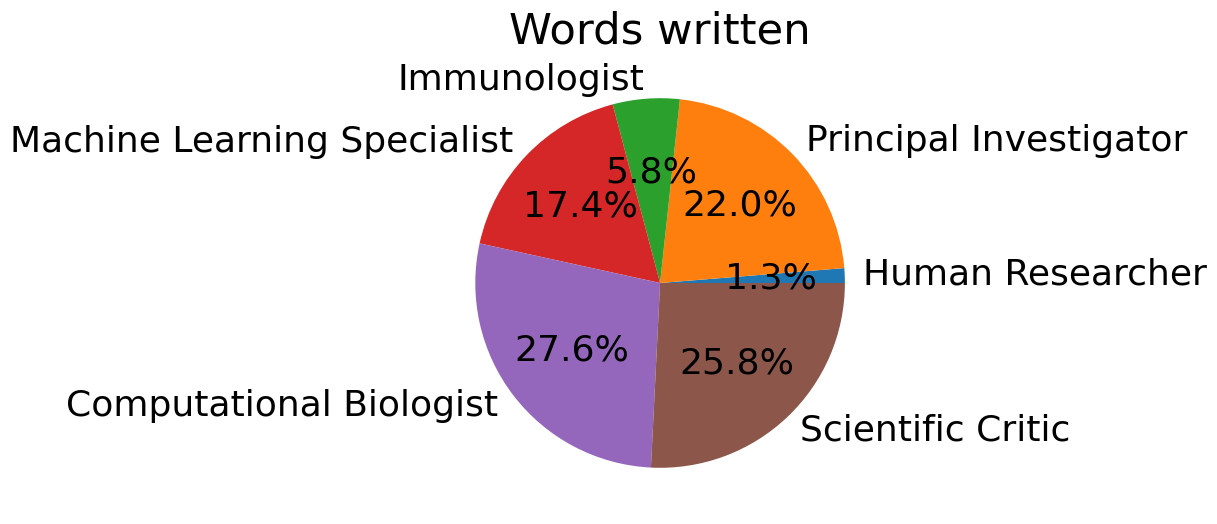

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.pie(
    agent_to_word_count.values(),
    labels=agent_to_word_count.keys(),
    autopct="%1.1f%%",
    colors=[agent_to_color[agent] for agent in agent_to_word_count],
)
ax.set_title(f"Words written")
plt.savefig(figure_dir / "total_words_written.pdf", bbox_inches="tight")

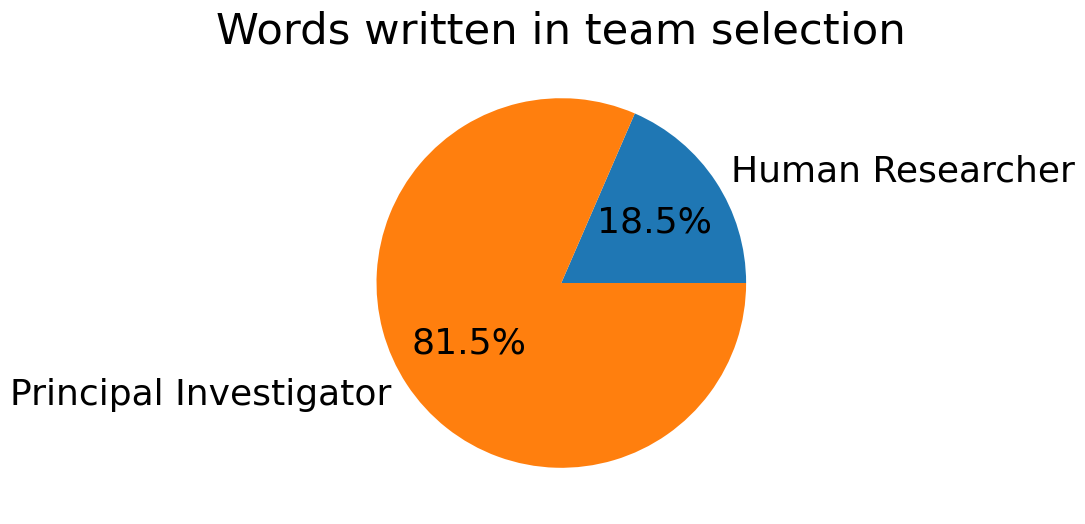

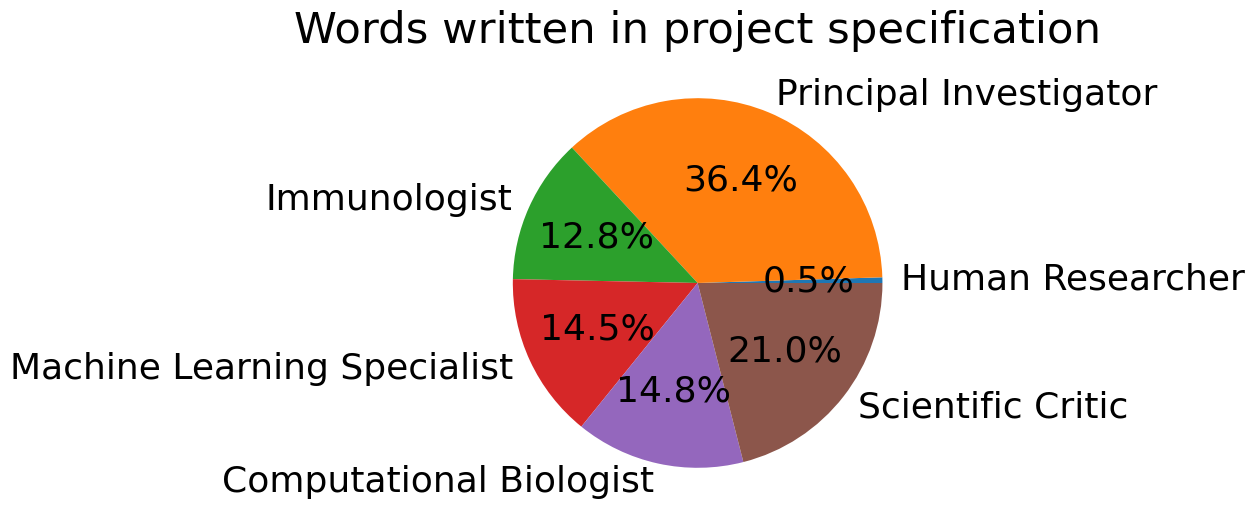

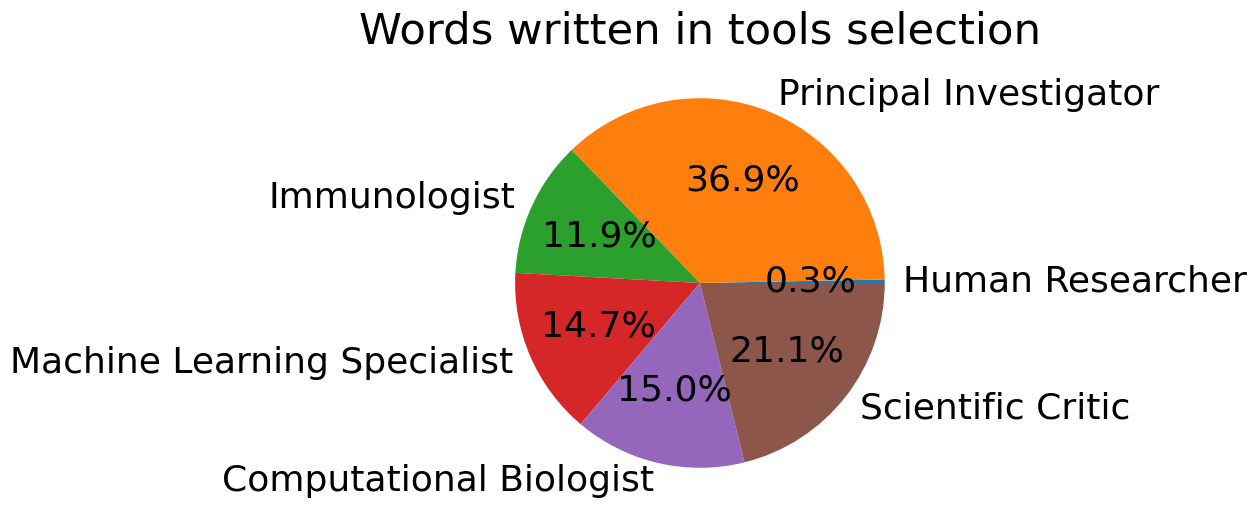

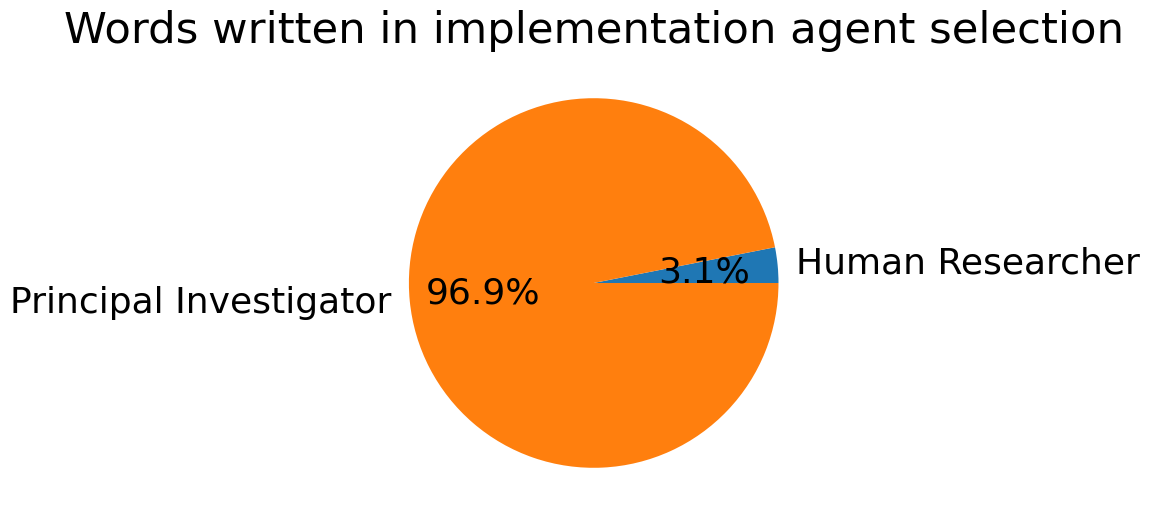

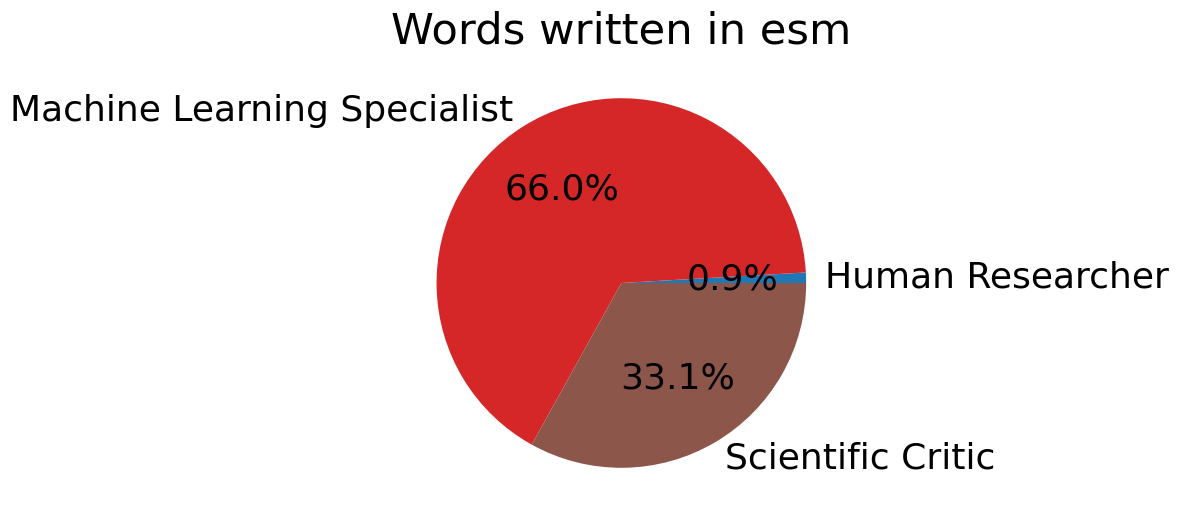

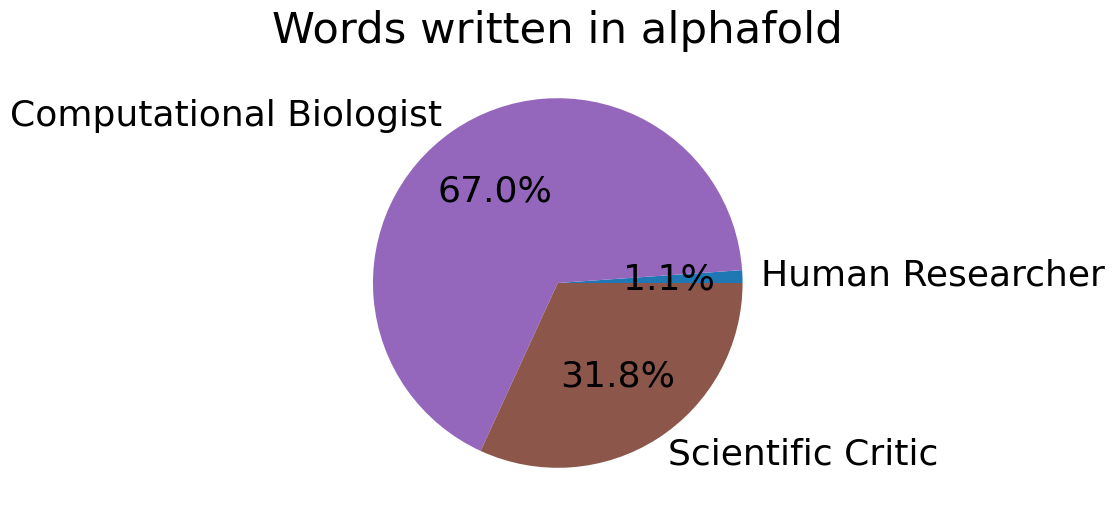

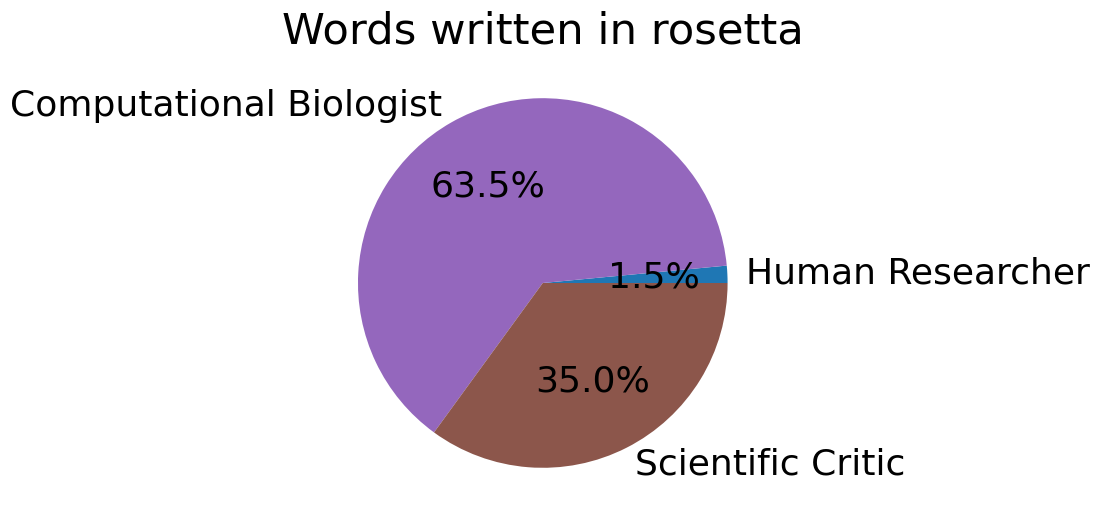

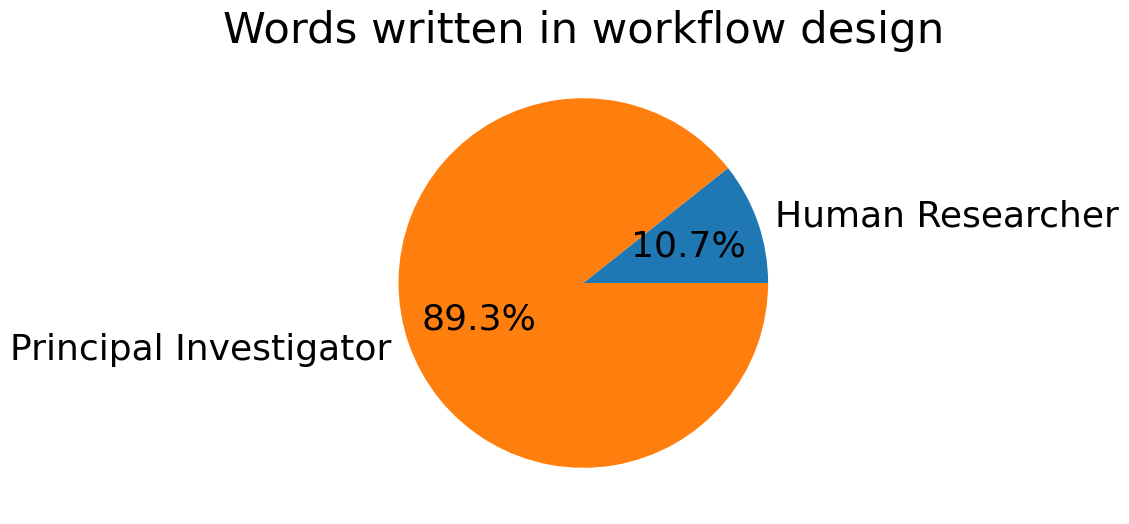

In [40]:
for phase in phase_to_agent_to_word_count:
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    ax.pie(
        phase_to_agent_to_word_count[phase].values(),
        labels=phase_to_agent_to_word_count[phase].keys(),
        autopct="%1.1f%%",
        colors=[agent_to_color[agent] for agent in phase_to_agent_to_word_count[phase]],
    )
    ax.set_title(f"Words written in {phase.replace('_', ' ')}")
    plt.savefig(figure_dir / f"{phase}_words_written.pdf", bbox_inches="tight")